# Instacart Basket Data Analysis

This script contains the following points:

#### 1. Personally Identifiable Information (PII) data 
#### 2. Geographic segmentation
#### 3. Low-activity customer
#### 4. Customer profilling
#### 5. Distribution of customer profile
#### 6. Statistics on customer-profile level for order frequency and expenditures
#### 7. Customer analysis by region
#### 8. Visualizations

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path= r'C:\Users\ashan\OneDrive\桌面\Data Analytic\Instacart Basket Analysis'

In [3]:
# Import dataset
df_all = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_all.pkl'))

In [120]:
# Import product department index
department_index = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

## 1. The Personally Identifiable Information (PII) data 

The dataset includes personally identifiable information (PII) such as user_id, gender, age, number of dependants, family status, and income. It's important to note that these data have been artificially generated for the purpose of training in this course, and do not represent real individuals.

The original customer data, which contained first names and last name, has been appropriately redacted from the dataset to ensure privacy and compliance with data protection regulations.

## 2. Geographic segmentation

### 2.1 Define regions

###### West

In [4]:
# Define West states
west_states = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [5]:
df_all.loc[df_all['state'].isin(west_states), 'region'] = 'West' # Assign region

###### Midwest

In [6]:
# Define Midwest states
mid_west_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [7]:
df_all.loc[df_all['state'].isin(mid_west_states), 'region'] = 'Midwest' # Assign region

###### South

In [8]:
# Define South states
west_states = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [9]:
df_all.loc[df_all['state'].isin(west_states), 'region'] = 'South' # Assign region

###### Northeast

In [10]:
# Define Northeast states
northeast_states = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [11]:
df_all.loc[df_all['state'].isin(northeast_states), 'region'] = 'Northeast' # Assign region

In [13]:
# User count by region
df_all['region'].value_counts(dropna = False)

region
South        10108492
West          7771859
Midwest       7113382
Northeast     5361318
Name: count, dtype: int64

### 2.2 Spending habbits by region

In [12]:
# Pivot spending_flag base on region
spend_by_region = pd.crosstab(df_all['region'], df_all['spending_flag'], dropna = False).sort_values(by = 'High spender', ascending = False)

In [15]:
spend_by_region # Spending by region

spending_flag,High spender,Low spender
region,,
South,197561,9910931
West,150155,7621704
Midwest,148540,6964842
Northeast,103090,5258228


In [16]:
# Pivot product price range base on region
price_region = pd.crosstab(df_all['region'], df_all['price_range'], dropna = False).sort_values(by = 'High-range product', ascending = False)

In [17]:
price_region # Price rang product preferance by region

price_range,High-range product,Low-range product,Mid-range product
region,,,
South,130108,3151237,6827147
West,100095,2427624,5244140
Midwest,91296,2219593,4802493
Northeast,68350,1678338,3614630


## 3. Low-activity customers

In [12]:
# Define low_activity customers
df_all.loc[df_all['order_number'] < 5, 'customer_activity'] = 'low_activity customers'

# Define high_activity customers
df_all.loc[df_all['order_number'] >= 5, 'customer_activity'] = 'high_activity customer'

In [19]:
# User count base on activity level
df_all['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    24435947
low_activity customers     5919104
Name: count, dtype: int64

## 4. Customer profilling

Age column is delineated into three categories for analytical purposes: 'young adult' (ages 18-40), 'middle age' (ages 40-60), and 'senior' (ages 60-81). 

Similarly, income column is stratified into four distinct tiers base on statistic percentile of the data: 'low income' (ranging from 25093 to 67124), 'lower middle class' (from 67124 to 96663), 'upper middle class' (from 96663 to 127961), and 'upper class' (from 127961 to 593901). 

Two dimentions are combined together to define customer profile. Total 12 groups users are categorized in the customer profile.

### 4.1 Define age, income groups

In [13]:
# Define low-income young adult group
df_all.loc[(df_all['age'] >= 18) & (df_all['age'] <= 40) 
         & (df_all['income'] >= 25903) & (df_all['income'] <= 67124),
      
         'customer_profile'] = 'low-income yound adult'

In [14]:
# Define low-income mid age group
df_all.loc[(df_all['age'] > 40) & (df_all['age'] <= 60) 
         & (df_all['income'] >= 25903) & (df_all['income'] <= 67124),
      
         'customer_profile'] = 'low-income mid age'

In [15]:
# Define low-income senior group
df_all.loc[(df_all['age'] > 60) &  (df_all['age'] <= 81  )
         & (df_all['income'] >= 25903) & (df_all['income'] <= 67124),
      
         'customer_profile'] = 'low-ncome senior'

In [16]:
# Define lower-middle-class young adult group
df_all.loc[(df_all['age'] >= 18) & (df_all['age'] <= 40) 
         & (df_all['income'] > 67124) & (df_all['income'] <= 96663),
      
         'customer_profile'] = 'lower-middle-class yound adult'

In [17]:
# Define loer-middle-class mid age group
df_all.loc[(df_all['age'] > 40) & (df_all['age'] <= 60) 
         & (df_all['income'] > 67124 ) & (df_all['income'] <= 96663 ),
      
         'customer_profile'] = 'lower-middle-class mid age'

In [18]:
# Define lower-middle-class seniot group
df_all.loc[(df_all['age'] > 60) &  (df_all['age'] <= 81  )
         & (df_all['income'] > 67124 ) & (df_all['income'] <= 96663 ),
      
         'customer_profile'] = 'lower-middle-class senior'

In [19]:
# Define upper-middle-class yound adult group
df_all.loc[(df_all['age'] >= 18) & (df_all['age'] <= 40) 
         & (df_all['income'] > 96663 ) & (df_all['income'] <= 127961 ),
      
         'customer_profile'] = 'upper-middle-class yound adult'

In [20]:
# Define upper-middle-class mid age group
df_all.loc[(df_all['age'] > 40) & (df_all['age'] <= 60) 
         & (df_all['income'] > 96663 ) & (df_all['income'] <= 127961 ),
      
         'customer_profile'] = 'upper-middle-class mid age'

In [21]:
# Define upper-middle-class senior group
df_all.loc[(df_all['age'] > 60) &  (df_all['age'] <= 81  )
         & (df_all['income'] > 96663 ) & (df_all['income'] <= 127961 ),
      
         'customer_profile'] = 'upper-middle-class senior'

In [22]:
# Define upper-class young adult group
df_all.loc[(df_all['age'] >= 18) & (df_all['age'] <= 40) 
         & (df_all['income'] > 127961 ) & (df_all['income'] <= 593901 ),
      
         'customer_profile'] = 'upper-class young adult'

In [23]:
# Define upper-class mid age group
df_all.loc[(df_all['age'] > 40) & (df_all['age'] <= 60) 
         & (df_all['income'] > 127961 ) & (df_all['income'] <= 593901 ),
      
         'customer_profile'] = 'upper-class mid age'

In [24]:
# Define upper-class senior group
df_all.loc[(df_all['age'] > 60) &  (df_all['age'] <= 81  )
         & (df_all['income'] > 127961 ) & (df_all['income'] <= 593901 ),
      
         'customer_profile'] = 'upper-class senior'

### 4.2 Family status and dependant's number with profile

In [32]:
# Familiy status count by customer profile
pro_fam = pd.crosstab(df_all['customer_profile'], df_all['fam_status'], dropna = False)
pro_fam

fam_status,divorced/widowed,living with parents and siblings,married,single
customer_profile,,,,
low-income mid age,13240,0,947821,299275
low-income yound adult,0,650977,3129390,1267147
low-ncome senior,314513,0,966532,0
lower-middle-class mid age,13423,0,924135,286332
lower-middle-class senior,339057,0,995917,0
lower-middle-class yound adult,0,690619,3098691,1240467
upper-class mid age,43396,0,2725554,884899
upper-class senior,948949,0,2858871,0
upper-class young adult,0,17252,81110,28689


In [33]:
# Number of dependants by customer profile
cust_dependants = pd.crosstab(df_all['customer_profile'], df_all['n_dependants'], dropna = False)
cust_dependants

n_dependants,0,1,2,3
customer_profile,,,,
low-income mid age,312515,317155,303947,326719
low-income yound adult,1267147,1251288,1264514,1264565
low-ncome senior,314513,323896,325437,317199
lower-middle-class mid age,299755,316298,295148,312689
lower-middle-class senior,339057,321308,349934,324675
lower-middle-class yound adult,1240467,1271021,1255025,1263264
upper-class mid age,928295,917081,885893,922580
upper-class senior,948949,929061,974773,955037
upper-class young adult,28689,31924,34501,31937


## 5. Distribution of customer profile

In [34]:
# Distribution of customer profile
df_all['customer_profile'].value_counts()

customer_profile
low-income yound adult            5047514
lower-middle-class yound adult    5029777
upper-class senior                3807820
upper-class mid age               3653849
upper-middle-class senior         3487912
upper-middle-class mid age        3372373
lower-middle-class senior         1334974
low-ncome senior                  1281045
low-income mid age                1260336
lower-middle-class mid age        1223890
upper-middle-class yound adult     728510
upper-class young adult            127051
Name: count, dtype: int64

Text(0.5, 0, 'User Count')

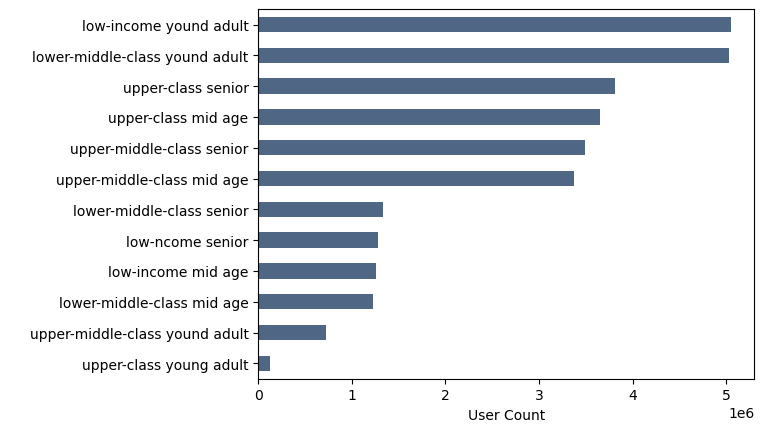

In [25]:
# Visualize the distribution of customer profile
df_all['customer_profile'].value_counts(dropna= False).sort_values(ascending= True).plot.barh(color='#4f6784')
plt.ylabel(' ') # Eliminate y lable
plt.xlabel('User Count')

## 6. Statistics on customer-profile for order frequency and expenditures

In [35]:
# Order frequency by customer profile
freqt_customer_profile = df_all.groupby('customer_profile').agg({'days_since_prior_order': ['mean','min','max']})
freqt_customer_profile

days_since_prior_order        
                                                 mean min max
customer_profile                                             
low-income mid age                          11.465097   0  30
low-income yound adult                      11.210998   0  30
low-ncome senior                            11.621295   0  30
lower-middle-class mid age                  11.078012   0  30
lower-middle-class senior                   10.931313   0  30
lower-middle-class yound adult              10.996363   0  30
upper-class mid age                         11.101339   0  30
upper-class senior                          10.972620   0  30
upper-class young adult                     10.356778   0  30
upper-middle-class mid age                  11.024216   0  30
upper-middle-class senior                   11.065450   0  30
upper-middle-class yound adult              11.321677   0  30

In [36]:
# Expenditure by customer profile
price_customer_profile = df_all.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})
price_customer_profile

prices              
                                      mean  min      max
customer_profile                                        
low-income mid age                6.687452  1.0     25.0
low-income yound adult            7.609188  1.0  14900.0
low-ncome senior                  6.706769  1.0     25.0
lower-middle-class mid age        8.968633  1.0  99999.0
lower-middle-class senior         8.938854  1.0  99999.0
lower-middle-class yound adult    8.630475  1.0  99999.0
upper-class mid age              17.716093  1.0  99999.0
upper-class senior               17.329118  1.0  99999.0
upper-class young adult         289.113531  1.0  99999.0
upper-middle-class mid age        8.972061  1.0  99999.0
upper-middle-class senior         8.841936  1.0  99999.0
upper-middle-class yound adult   18.269532  1.0  99999.0

## 7. Customer analysis by region

### 7.1 The South

In [26]:
# Creat subset for the South region
south_customer = df_all[df_all['region']== 'South']

###### Demographic outlook

In [38]:
# User count for the South region 
south_customer['user_id'].value_counts().sum()

10108492

In [39]:
# User count by customer profile 
south_customer['customer_profile'].value_counts()

customer_profile
lower-middle-class yound adult    1708134
low-income yound adult            1697538
upper-class senior                1265050
upper-class mid age               1185187
upper-middle-class senior         1146358
upper-middle-class mid age        1083572
lower-middle-class senior          456870
low-ncome senior                   426796
lower-middle-class mid age         423585
low-income mid age                 419214
upper-middle-class yound adult     248451
upper-class young adult             47737
Name: count, dtype: int64

In [40]:
# Family status count
south_customer['fam_status'].value_counts()

fam_status
married                             7082188
single                              1668371
divorced/widowed                     861973
living with parents and siblings     495960
Name: count, dtype: int64

In [41]:
# Number of dependant count
south_customer['n_dependants'].value_counts()

n_dependants
2    2551630
3    2536085
0    2530344
1    2490433
Name: count, dtype: int64

###### Spending habbits

In [42]:
# Total spending of the South customers
south_customer['prices'].sum()

123169872.7999999

In [43]:
# Customer spending statistics
south_customer['prices'].describe()

count    1.010849e+07
mean     1.218479e+01
std      5.071636e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [62]:
# Spending habbits outlook

south_customer['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     9910931
High spender     197561
Name: count, dtype: int64

###### Favorite goods and department

In [45]:
# Top 10 goods by order
south_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    148510
Bag of Organic Bananas    119220
Organic Strawberries       82849
Organic Baby Spinach       76447
Organic Hass Avocado       66157
Organic Avocado            53917
Large Lemon                47507
Strawberries               44902
Organic Raspberries        44078
Organic Whole Milk         44072
Name: count, dtype: int64

In [46]:
# The most counts of order by departments
south_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     2965921
16    1691172
19     896804
7      842605
1      695858
Name: count, dtype: int64

In [47]:
# Set data dictionary
department_index.set_index('department_id', inplace=True)
dept_dict = department_index.to_dict('index') 

In [48]:
print(dept_dict.get(4))

{'department': 'produce'}


In [49]:
print(dept_dict.get(16))

{'department': 'dairy eggs'}


In [50]:
print(dept_dict.get(19))

{'department': 'snacks'}


###### Produce, dairy eggs and snacks are the top 3 popular departments for order

###### Order habbits 

In [51]:
# Brand loyalty check
south_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    5049359
Loyal customer      3345805
New customer        1713328
Name: count, dtype: int64

In [52]:
# Order frequency check
south_customer['frequency_flag'].value_counts(dropna= False)

frequency_flag
Frequent customer        6902746
Regular customer         2182888
Non-frequent customer    1022858
Name: count, dtype: int64

In [53]:
# The number of order check
south_customer['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    8136051
low_activity customers    1972441
Name: count, dtype: int64

### 7.2 The West

In [26]:
# Create subset for the West region
west_customer = df_all.loc[df_all['region'] == 'West']

###### Demographic outlook

In [66]:
# User count of the West region 
west_customer['user_id'].value_counts().sum()

7771859

In [67]:
# Customer profile count
west_customer['customer_profile'].value_counts()

customer_profile
low-income yound adult            1296804
lower-middle-class yound adult    1260817
upper-class senior                 963930
upper-class mid age                945529
upper-middle-class senior          895913
upper-middle-class mid age         869659
lower-middle-class senior          348060
low-ncome senior                   327227
low-income mid age                 326508
lower-middle-class mid age         322055
upper-middle-class yound adult     187273
upper-class young adult             28084
Name: count, dtype: int64

In [68]:
# Marriage status count
west_customer['fam_status'].value_counts()

fam_status
married                             5466829
single                              1283559
divorced/widowed                     659513
living with parents and siblings     361958
Name: count, dtype: int64

In [69]:
# Number of dependant count
west_customer['n_dependants'].value_counts()

n_dependants
3    1977972
0    1943072
2    1928894
1    1921921
Name: count, dtype: int64

###### Spending habbits

In [70]:
# Total spending of the South customers
west_customer['prices'].sum()

87745289.00000012

In [71]:
# Customer spending statistics
west_customer['prices'].describe()

count    7.771859e+06
mean     1.129013e+01
std      4.282891e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [72]:
# Spending habbits outlook
west_customer['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     7621704
High spender     150155
Name: count, dtype: int64

###### Favorite goods

In [73]:
# Top 10 goods by order
west_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    112979
Bag of Organic Bananas     92900
Organic Strawberries       63571
Organic Baby Spinach       58246
Organic Hass Avocado       53680
Organic Avocado            40553
Large Lemon                36378
Strawberries               34598
Limes                      34010
Organic Whole Milk         33311
Name: count, dtype: int64

In [75]:
# The most counts of order by departments
west_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     2276501
16    1302671
19     695865
7      638190
1      532034
Name: count, dtype: int64

###### Produce, dairy eggs and snacks are the top 3 popular departments.

###### Order habbits 

In [78]:
# Brand loyalty check
west_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    3835765
Loyal customer      2616933
New customer        1319161
Name: count, dtype: int64

In [79]:
# Order frequency check
west_customer['frequency_flag'].value_counts(dropna= False)

frequency_flag
Frequent customer        5323569
Regular customer         1666983
Non-frequent customer     781307
Name: count, dtype: int64

In [80]:
# The number of order check
west_customer['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    6264244
low_activity customers    1507615
Name: count, dtype: int64

### 7.3 The Midwest

In [27]:
# Create subset for the Mid-west region
midwest_customer = df_all.loc[df_all['region'] == 'Midwest']

###### Demographic outlook

In [82]:
# Count the number of users 
midwest_customer['user_id'].value_counts().sum()

7113382

In [83]:
# Customer profile count
midwest_customer['customer_profile'].value_counts()

customer_profile
lower-middle-class yound adult    1168963
low-income yound adult            1168299
upper-class senior                 890468
upper-class mid age                887094
upper-middle-class senior          827441
upper-middle-class mid age         810426
lower-middle-class senior          294419
low-ncome senior                   294352
low-income mid age                 294090
lower-middle-class mid age         274036
upper-middle-class yound adult     175445
upper-class young adult             28349
Name: count, dtype: int64

In [84]:
# Marriage status count
midwest_customer['fam_status'].value_counts()

fam_status
married                             4984656
single                              1180336
divorced/widowed                     605065
living with parents and siblings     343325
Name: count, dtype: int64

In [85]:
# Number of dependant count
midwest_customer['n_dependants'].value_counts()

n_dependants
1    1804147
0    1785401
2    1770328
3    1753506
Name: count, dtype: int64

###### Spending habbits

In [86]:
# Total spending of the South customers
midwest_customer['prices'].sum()

90891489.20000002

In [87]:
# Customer spending statistics
midwest_customer['prices'].describe()

count    7.113382e+06
mean     1.277754e+01
std      5.704126e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [88]:
# Spending habbits outlook

midwest_customer['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     6964842
High spender     148540
Name: count, dtype: int64

###### Favorite goods

In [89]:
# Top 10 goods by order
midwest_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    103371
Bag of Organic Bananas     84723
Organic Strawberries       57783
Organic Baby Spinach       52677
Organic Hass Avocado       46873
Organic Avocado            37877
Large Lemon                34946
Strawberries               31566
Limes                      31077
Organic Raspberries        30280
Name: count, dtype: int64

In [90]:
# The most counts of order by departments
midwest_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     2089837
16    1188680
19     631295
7      586213
1      487248
Name: count, dtype: int64

###### Produce, dairy eggs and snacks are the top 3 popular departments.

###### Order habbits 

In [94]:
# Brand loyalty check
midwest_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    3565211
Loyal customer      2332005
New customer        1216166
Name: count, dtype: int64

In [95]:
# Order frequency check
midwest_customer['frequency_flag'].value_counts(dropna= False)

frequency_flag
Frequent customer        4813157
Regular customer         1572590
Non-frequent customer     727635
Name: count, dtype: int64

In [96]:
# The number of order check
midwest_customer['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    5716322
low_activity customers    1397060
Name: count, dtype: int64

### 7.4 The Northeast

In [28]:
# Create subset for the North-east region
northeast_customer = df_all.loc[df_all['region'] == 'Northeast']

###### Demographic outlook

In [98]:
# Count the number of users 
northeast_customer['user_id'].value_counts().sum()

5361318

In [99]:
# Customer profile count
northeast_customer['customer_profile'].value_counts()

customer_profile
lower-middle-class yound adult    891863
low-income yound adult            884873
upper-class senior                688372
upper-class mid age               636039
upper-middle-class senior         618200
upper-middle-class mid age        608716
lower-middle-class senior         235625
low-ncome senior                  232670
low-income mid age                220524
lower-middle-class mid age        204214
upper-middle-class yound adult    117341
upper-class young adult            22881
Name: count, dtype: int64

In [100]:
# Marriage status count
northeast_customer['fam_status'].value_counts()

fam_status
married                             3781772
single                               857273
divorced/widowed                     470108
living with parents and siblings     252165
Name: count, dtype: int64

In [101]:
# Number of dependant count
northeast_customer['n_dependants'].value_counts()

n_dependants
3    1354438
1    1351748
2    1327751
0    1327381
Name: count, dtype: int64

###### Spending habbits

In [102]:
# Total spending of the South customers
northeast_customer['prices'].sum()

61796886.49999996

In [103]:
# Customer spending statistics
northeast_customer['prices'].describe()

count    5.361318e+06
mean     1.152644e+01
std      4.595899e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [104]:
# Spending habbits outlook
northeast_customer['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     5258228
High spender     103090
Name: count, dtype: int64

###### Favorite goods

In [105]:
# Top 10 goods by order
northeast_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    78171
Bag of Organic Bananas    63449
Organic Strawberries      44016
Organic Baby Spinach      39603
Organic Hass Avocado      35768
Organic Avocado           29281
Large Lemon               25466
Organic Whole Milk        23607
Strawberries              23225
Limes                     23137
Name: count, dtype: int64

In [94]:
# The most counts of order by departments
northeast_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     1562648
16     898463
19     482677
7      453654
1      362969
Name: count, dtype: int64

###### Produce, dairy eggs and snacks are the top 3 popular departments.

###### Order habbits 

In [106]:
# Brand loyalty check
northeast_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    2644288
Loyal customer      1809809
New customer         907221
Name: count, dtype: int64

In [107]:
# Order frequency check
northeast_customer['frequency_flag'].value_counts(dropna= False)

frequency_flag
Frequent customer        3652250
Regular customer         1179552
Non-frequent customer     529516
Name: count, dtype: int64

In [108]:
# The number of order check
northeast_customer['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    4319330
low_activity customers    1041988
Name: count, dtype: int64

## 8. Visualizations

###### 8.1 Odering Habitts with Ordering Time and Day

Text(0.5, 1.0, 'Histogram of Order Day of Week')

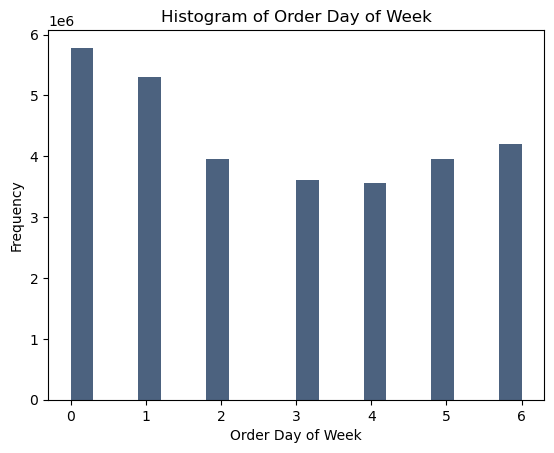

In [109]:
# Viz of the busiest day of week for order
busiest_dow = df_all['order_day_of_week'].plot.hist(bins = 20, color = '#4c627f')

plt.xlabel('Order Day of Week')  # Label for the x-axis
plt.title('Histogram of Order Day of Week') # Chart title

Text(0.5, 1.0, 'Histogram of Order Time of Day')

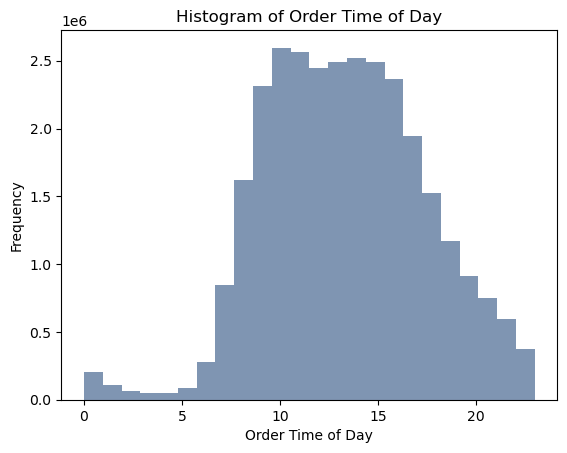

In [110]:
# Viz of the busiest hour of day for order
busiest_hod = df_all['order_hour_of_day'].plot.hist(bins = 24, color = '#7f95b2')

plt.xlabel('Order Time of Day')  # Label for the x-axis
plt.title('Histogram of Order Time of Day')  # Title of the bar chart

###### 8.2 Product Price with Day and Time

In [111]:
# Create Sample data
np.random.seed(4)
dev = np.random.rand(len(df_all)) <= 0.7

# Store 70% of the sample in the data frame big
big = df_all[dev]
# Store 30% of the sample in the data frame small
small = df_all[~dev] 

C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Trend of Product Price with Order Time')

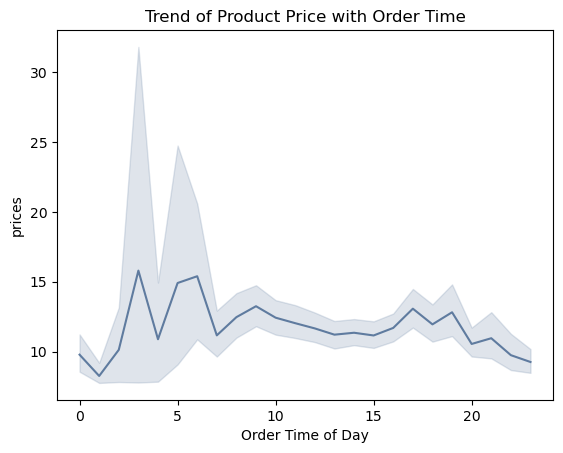

In [113]:
# Create line chart with random small sample data of the dataset to discover the insight of the price of goods and the order time of the day

tod_price = sns.lineplot(data = small, x = 'order_hour_of_day',y = 'prices',color = '#5f7b9f')

plt.xlabel('Order Time of Day')  # Label for the x-axis
plt.title('Trend of Product Price with Order Time')  # Title of the bar chart

In [117]:
# Save figure
tod_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'tod_price.png'))

C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Trend of Product Price with Order Day')

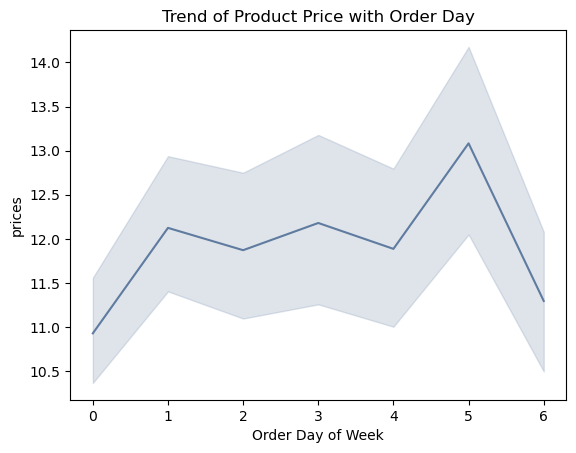

In [118]:
# Create line chart with random small sample data of the dataset

dow_price = sns.lineplot(data = small, x = 'order_day_of_week',y = 'prices',color = '#5f7b9f')

plt.xlabel('Order Day of Week')  # Label for the x-axis
plt.title('Trend of Product Price with Order Day')  # Title of the bar chart

In [119]:
# Save figure
dow_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow_price.png'))

###### 8.3 Product Price Range Insight

In [123]:
# Price range order count
df_all['price_range'].value_counts(dropna= False)

price_range
Mid-range product     20488410
Low-range product      9476792
High-range product      389849
Name: count, dtype: int64

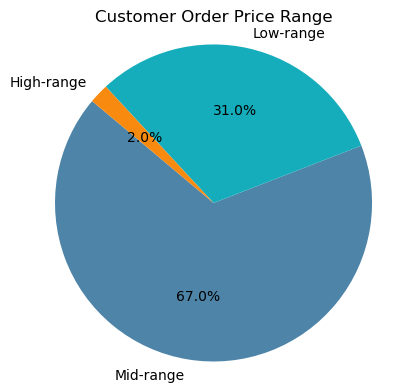

In [31]:
# Data to plot 
labels = ['Mid-range', 'Low-range', 'High-range']
sizes = [67, 31, 2]  # These values represent the percentages of each category
colors = ['#4d84a8', '#15adbb', '#f88a10']


# Plot 
plt.figure(figsize=(4.5, 4.5))  # Set the size of the plot
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%',startangle=140  )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Customer Order Price Range')  # Title of the bar chart

# Save figure
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_product_order_count.png'))

###### 8.4 Customers' Favorite Products and Departments

Text(0, 0.5, ' ')

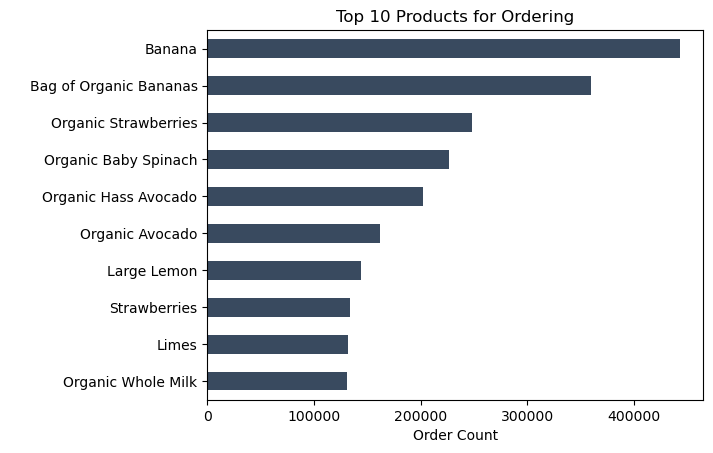

In [51]:
#Finding most popular products
favor_prod=df_all['product_name'].value_counts(dropna=False).head(10).sort_values(ascending= True).plot.barh(color=['#394a5f'])

plt.title('Top 10 Products for Ordering') # Chart title
plt.xlabel('Order Count')  # Label for the x-axis
plt.ylabel(' ')  # Label for the y-axis

In [37]:
# Finding most popular products
favor_dept=df_all['department_id'].value_counts(dropna=False).head(10)

Text(0, 0.5, 'Department ID')

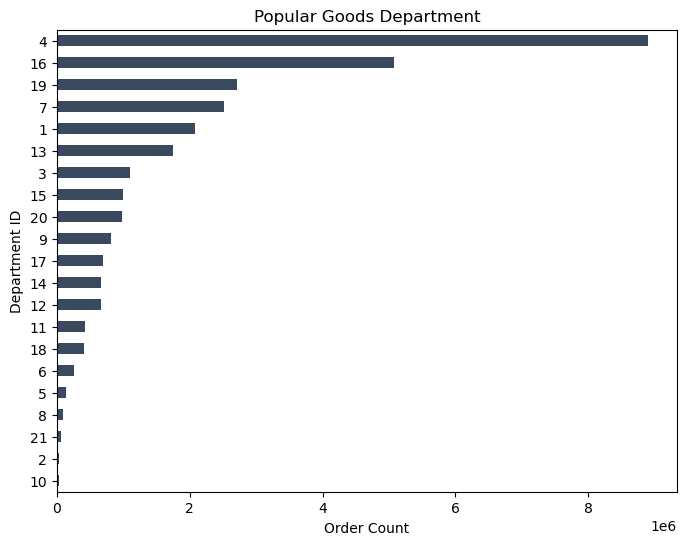

In [39]:
# Setting figure size
plt.figure(figsize=(8, 6))

#Finding most popular department
favor_dept=df_all['department_id'].value_counts(dropna=False).sort_values(ascending= True).plot.barh(color=['#394a5f'])

plt.title('Popular Goods Department') # Chart title
plt.xlabel('Order Count')  # Label for the x-axis
plt.ylabel('Department ID')  # Label for the y-axis

In [40]:
favor_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department.png'))

###### 8.5 Ordering Habbits Analysis

8.5.1.Brand loyalty Ditribution

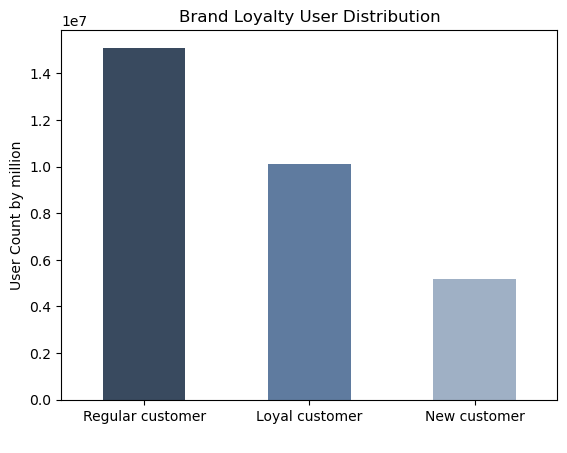

In [29]:
# Create bar chart for brand loyalty user count
df_all['loyalty_flag'].value_counts().plot.bar(color =['#394a5f', '#5f7b9f', '#9fb0c5'])

plt.xticks(rotation=0) # x-axis lable angle
plt.title('Brand Loyalty User Distribution') # Chart title
plt.ylabel('User Count by million')  # Label for the y-axis
plt.xlabel(' ') # Label for the x-axis

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_user.png')) # Save figure

8.5.2. Ordering habbits base on loyalty status

Spending habbits by loyalty status

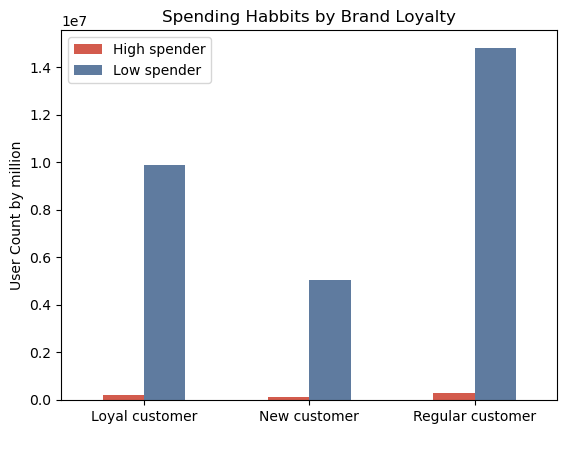

In [75]:
# Group spending flag by loyalty flag
grouped_counts = df_all.groupby(['loyalty_flag', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Spending Habbits by Brand Loyalty')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spending.png')) # Save figure

Order frequency by loyalty status

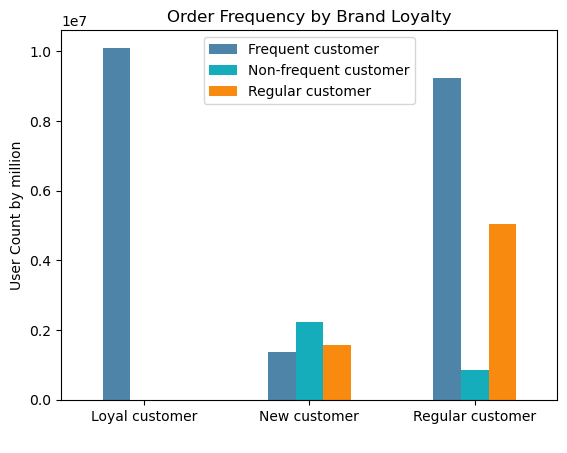

In [30]:
# Group frequency flag by loyalty flag
grouped_counts = df_all.groupby(['loyalty_flag', 'frequency_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Order Frequency by Brand Loyalty')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_freqt.png')) # Save figure

Customer activity by loyalty status

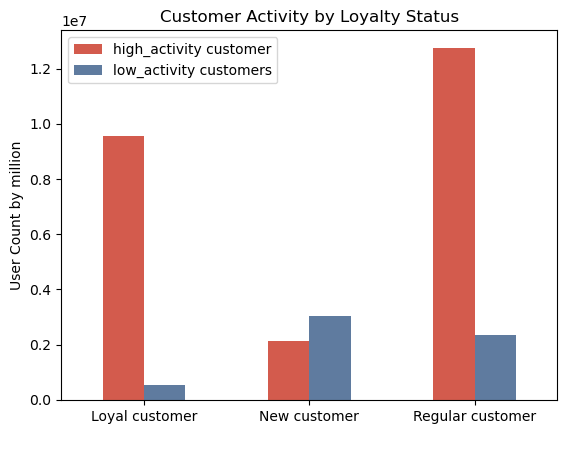

In [76]:
# Group customer activity by loyalty flag
grouped_counts = df_all.groupby(['loyalty_flag', 'customer_activity']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Customer Activity by Loyalty Status')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_act.png')) # Save figure

8.5.3. Ordering habbits base on customer regions

In [74]:
# Create a subset to analyze customer ordering habbits.
user_ord_hab = df_all[['user_id','region','age','income','product_name','department_id','fam_status','loyalty_flag','frequency_flag','price_range','spending_flag','customer_activity','customer_profile']]

Brand loyalty by region

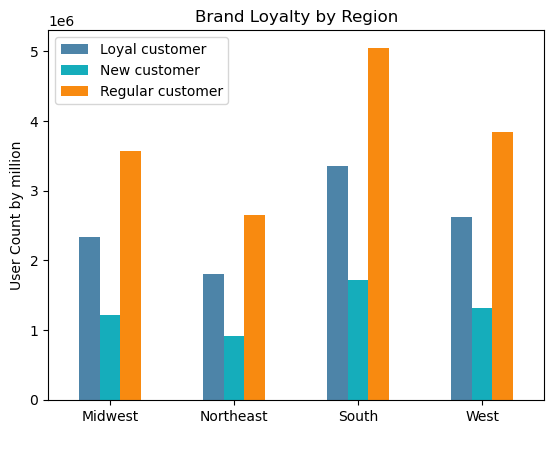

In [77]:
# Group loyalty flag by region
grouped_counts = user_ord_hab.groupby(['region', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Brand Loyalty by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_loy.png')) # Save figure

Spending habbits by region

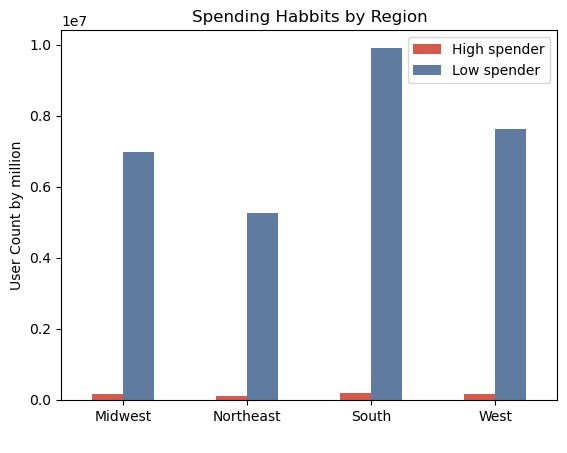

In [78]:
# Group spending flag by region
grouped_counts = user_ord_hab.groupby(['region', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Spending Habbits by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spd.png')) # Save figure

Order frequency by region

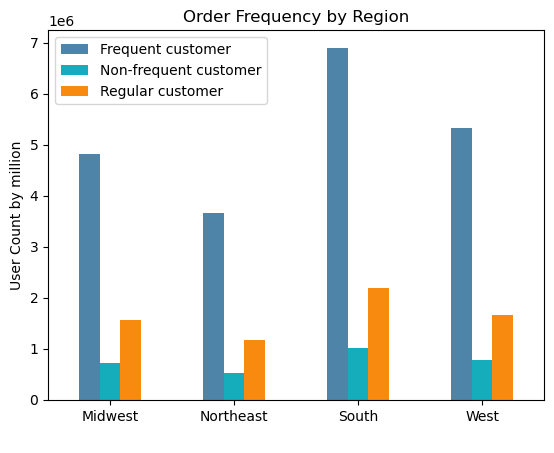

In [79]:
# Group order frequncy by region
grouped_counts = user_ord_hab.groupby(['region', 'frequency_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Order Frequency by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_frqt.png')) # Save figure

8.5.4. Ordering habbits base on age and family status

In [35]:
# Define age groups
user_ord_hab.loc[(user_ord_hab['age'] >= 18) & (user_ord_hab['age'] <= 40) ,'age_profile'] = 'young adult'
user_ord_hab.loc[(user_ord_hab['age'] > 40) & (user_ord_hab['age'] <= 60) ,'age_profile'] = 'mid-age'
user_ord_hab.loc[(user_ord_hab['age'] > 60) & (user_ord_hab['age'] <= 81) ,'age_profile'] = 'senior'

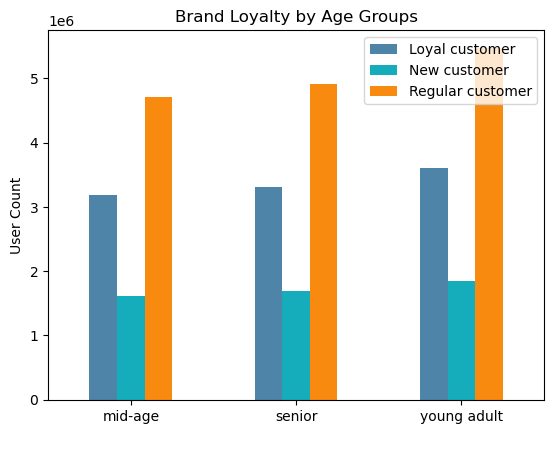

In [36]:
# Brand Loyalty by age groups

grouped_counts = user_ord_hab.groupby(['age_profile', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Age Groups')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_loyal.png')) # Save figure

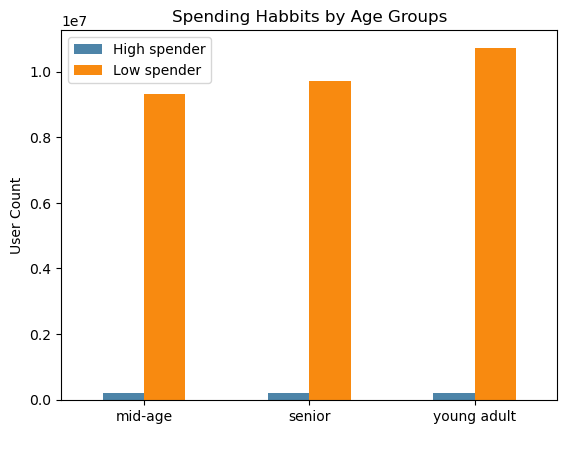

In [37]:
# Spending habit by age groups

grouped_counts = user_ord_hab.groupby(['age_profile', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Age Groups')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_sped.png')) # Save figure

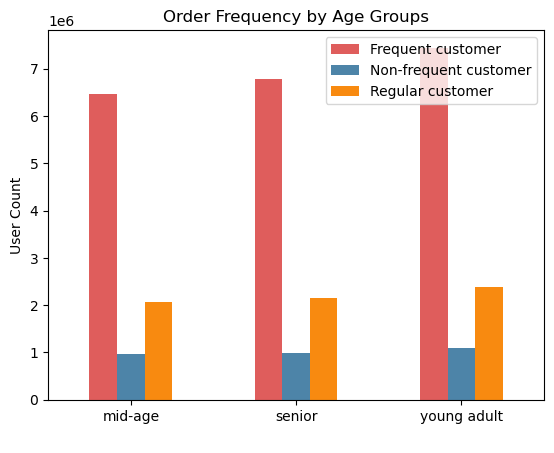

In [38]:
# Order frequency by age groups

grouped_counts = user_ord_hab.groupby(['age_profile', 'frequency_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#df5d5c','#4d84a8', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Age Groups')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_freq.png')) # Save figure

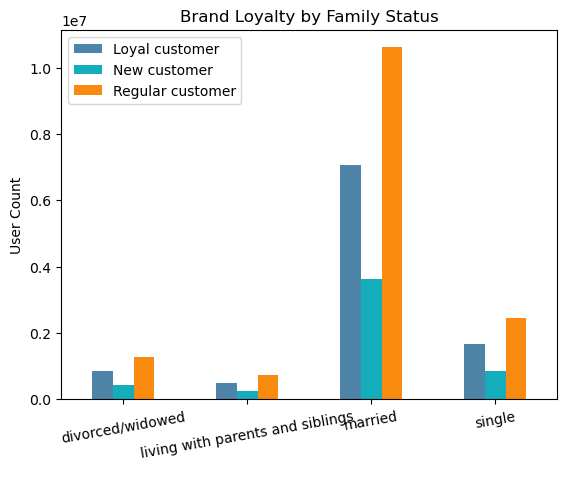

In [39]:
# Brand loyalty by famiy status

grouped_counts = user_ord_hab.groupby(['fam_status', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Family Status')
plt.xticks(rotation=10)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_loyal.png')) # Save figure

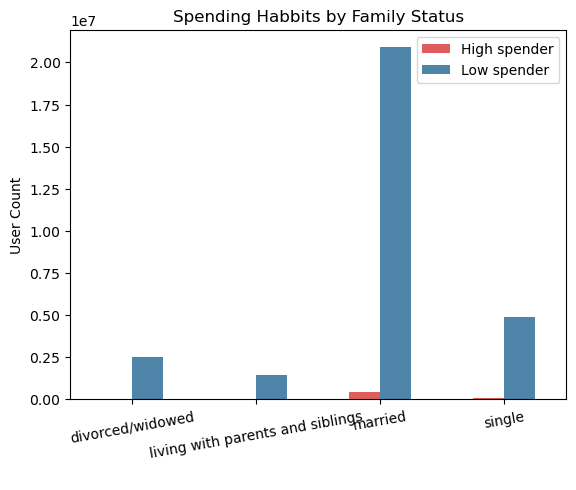

In [49]:
# Spending habbits by famiy status

grouped_counts = user_ord_hab.groupby(['fam_status', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#df5d5c','#4d84a8', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Family Status')
plt.xticks(rotation=10)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_sped.png')) # Save figure

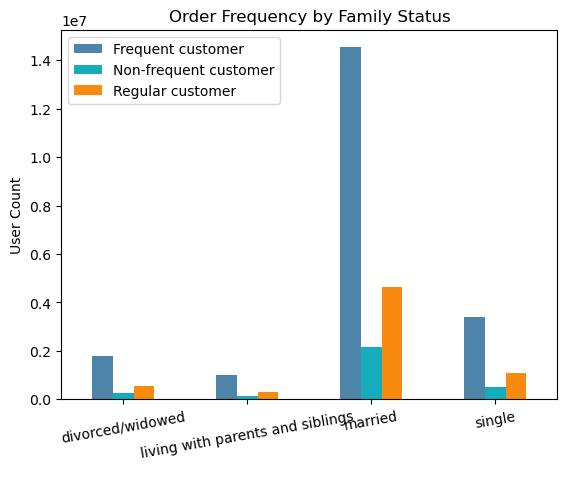

In [48]:
# Order frequency by famiy status

grouped_counts = user_ord_hab.groupby(['fam_status', 'frequency_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Family Status')
plt.xticks(rotation=10)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_freq.png')) # Save figure

8.5.5. Ordering habbits base on demographic infomation

In [27]:
# Define income groups
user_ord_hab.loc[(user_ord_hab['income'] < 62636) ,'income_profile'] = 'low-income'
user_ord_hab.loc[(user_ord_hab['income'] >=62636) & (user_ord_hab['income'] < 95450) ,'income_profile'] = 'lower-middle-class'
user_ord_hab.loc[(user_ord_hab['income'] >= 95450) & (user_ord_hab['income'] < 133392) ,'income_profile'] = 'upper-middle-class'
user_ord_hab.loc[(user_ord_hab['income'] >= 133392) ,'income_profile'] = 'upper-class'

C:\Users\ashan\AppData\Local\Temp\ipykernel_23624\3800384968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_ord_hab.loc[(user_ord_hab['income'] < 62636) ,'income_profile'] = 'low-income'


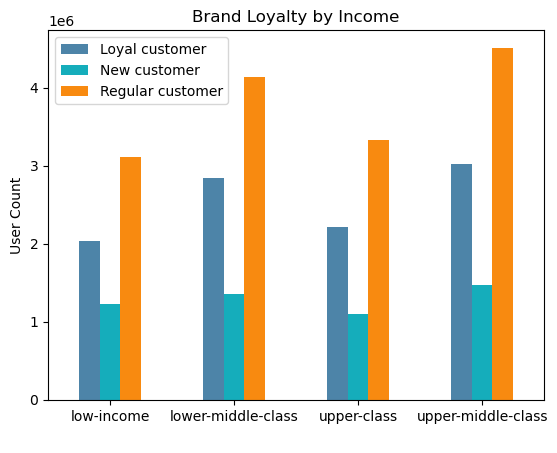

In [54]:
# Brand loyalty by income profile

grouped_counts = user_ord_hab.groupby(['income_profile', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Income')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'in_loyal.png')) # Save figure

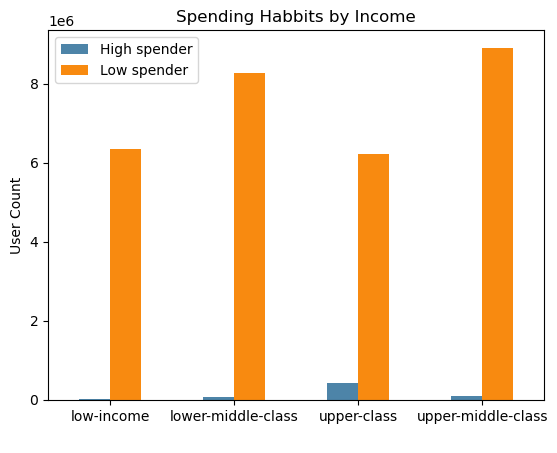

In [56]:
# Spending habbits by income profile

grouped_counts = user_ord_hab.groupby(['income_profile', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8',  '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Income')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'in_sped.png')) # Save figure

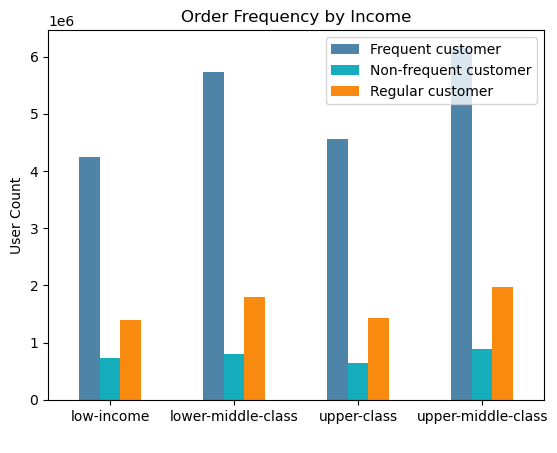

In [57]:
# Order frequency by income profile

grouped_counts = user_ord_hab.groupby(['income_profile', 'frequency_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Income')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'in_freq.png')) # Save figure

###### According to data above, the target segment is define as married, middle class young adult.

In [62]:
# Define target segment 
Target_segment = user_ord_hab.loc[
    (user_ord_hab['age_profile'] == 'young adult') & 
    ((user_ord_hab['income_profile'] == 'upper-middle-class') | (user_ord_hab['income_profile'] == 'lower-middle-class')) & 
    (user_ord_hab['fam_status'] == 'married')
]

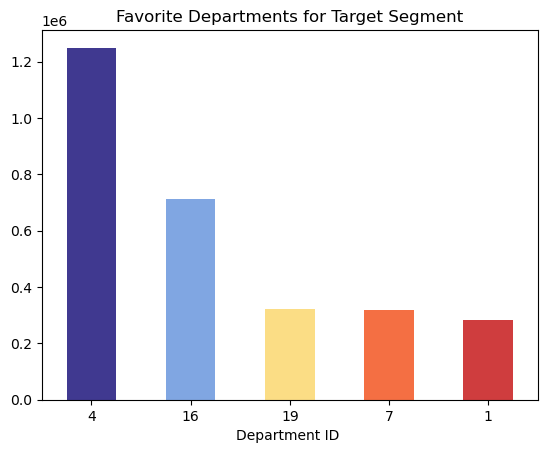

In [73]:
# The popular departments for the target segment
Target_segment['department_id'].value_counts().sort_values(ascending= False ).head(5).plot(kind='bar', color=['#403990', '#80a6e2', '#fbdd85','#f46f43','#cf3d3e'])
plt.xticks(rotation=0)


# Add labels and title
plt.xlabel('Department ID ')
plt.title('Favorite Departments for Target Segment')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'faovr_dept_target.png')) # Save figure

###### Department 4 and 16 have the most order by target segment. Department 4 is produce and department 16 is dairy eggs.

8.5.6. Ordering habbits base on customer profile

The price of order

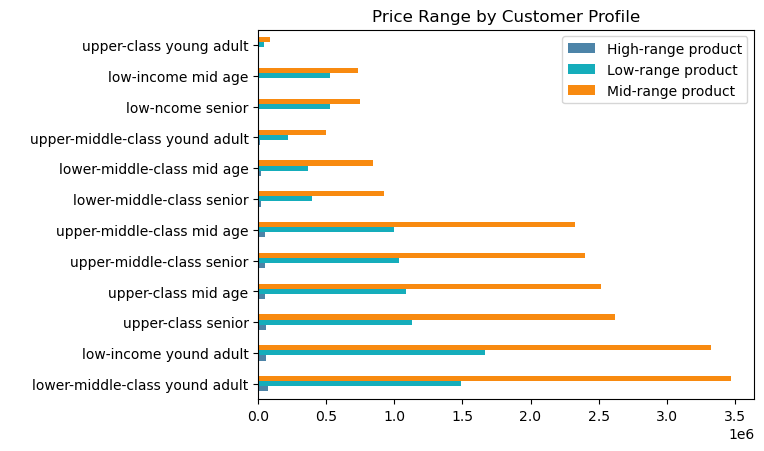

In [87]:
# Group price range order by customer profile
grouped_counts = user_ord_hab.groupby(['customer_profile', 'price_range']).size().unstack().sort_values(by= 'High-range product', ascending = False)

# Plot in to chart
grouped_counts.plot(kind='barh', color = ['#4d84a8','#15adbb','#f88a10'])

# Add labels and title
plt.ylabel(' ')
plt.title('Price Range by Customer Profile')
plt.legend(title =None)


plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_cus_pro.png')) # Save figure

The frequency of order

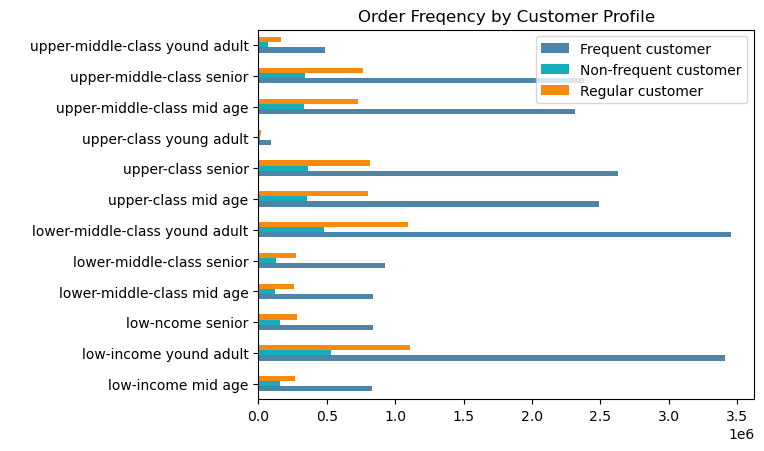

In [91]:
# Group price range order by customer profile
grouped_counts = user_ord_hab.groupby(['customer_profile', 'frequency_flag']).size().unstack() 

# Plot in to chart
grouped_counts.plot(kind='barh', color = ['#4d84a8','#15adbb','#f88a10'])

# Add labels and title
plt.ylabel(' ')
plt.title('Order Freqency by Customer Profile')
plt.legend(title =None)


plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'freqt_cus_pro.png')) # Save figure

The product order base on customer profile

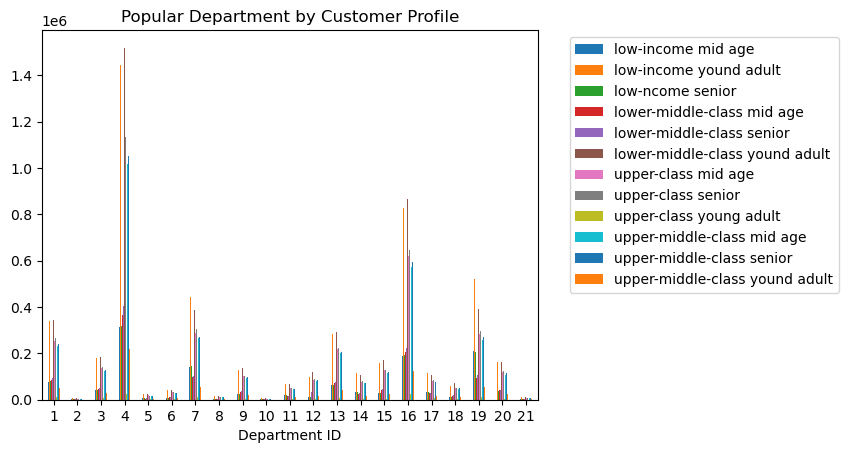

In [119]:
# Group customer profile by department id
grouped_counts = user_ord_hab.groupby(['department_id', 'customer_profile']).size().unstack() 

# Plot in to chart
grouped_counts.plot(kind='bar')

# Add label and title
plt.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xlabel('Department ID')
plt.title('Popular Department by Customer Profile')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prod_cust.png')) # Save figure